In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

['log/ml-10m_05/training.log']
Error tokenizing data. C error: Expected 1 fields in line 3, saw 2

['log/ml-1m_O1/train_loss19.csv']
['log/ml-100k_UF/train_loss10.csv']
['log/ml-100k_MF/train_loss17.csv']
['log/ml-1m_TZ/train_loss11.csv']


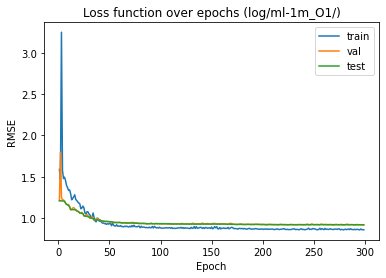

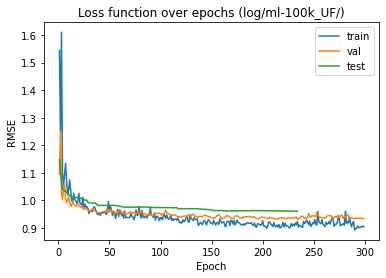

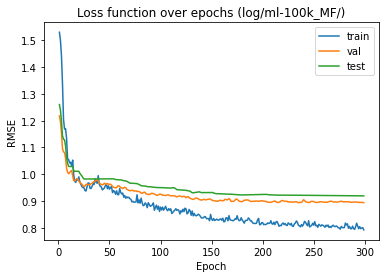

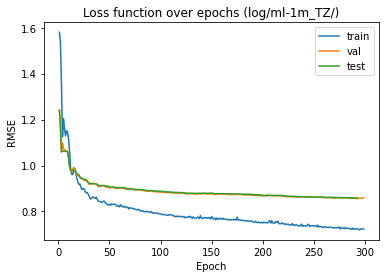

In [6]:
dirs = next(os.walk('log'))[1]
dirs = ['log/' + d + '/' for d in dirs]

for d in dirs:
    try:
        print(glob( d + 'train*'))
        train_loss = pd.read_csv(glob( d + 'train*')[0])
        val_loss = pd.read_csv(glob( d + 'val*')[0])
        test_loss = pd.read_csv(glob( d + 'test*')[0])

        plt.plot('iter', 'rmse', data=train_loss, label='train')
        plt.plot('iter', 'rmse', data=val_loss, label='val')
        plt.plot('iter', 'rmse', data=test_loss, label='test')

        plt.title(f"Loss function over epochs ({d})")
        plt.xlabel("Epoch")
        plt.ylabel("RMSE")
        plt.legend()

        plt.show()
    except Exception as e:
        print(e)